# Tutorial 3: CommonRoad-io for trailer-truck model

This tutorial is similar to Tutorial 1, where we demonstrated how to load, visualize and modify a CommonRoad scenario. Here, we show that CommonRoad is also capable of modeling trailer-truck models using a scenario from a loading bay and a pre-stored trajectory, which has been computed with a parking planner for trucks. 

For details on how the vehicle dynamics of a truck are modelled in CommonRoad, please check out the [Vehicle Models Documentation](https://gitlab.lrz.de/tum-cps/commonroad-vehicle-models/-/blob/master/vehicleModels_commonRoad.pdf).

## 1. Read Loading Bay Scenario

We begin by loading the scenario using the CommonRoadFielReader().

In [5]:
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.mp_renderer import MPRenderer

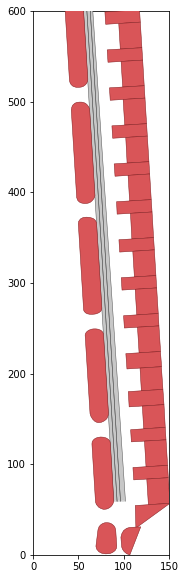

In [3]:
# generate path of the file to be opened
file_path = "ZAM_Loading_Bay-1_1_T.xml"

# read in the scenario and planning problem set
scenario, planning_problem_set = CommonRoadFileReader(file_path).open()

# plot the scenario
rnd = MPRenderer( figsize=(25, 10), plot_limits=[0, 150, 0, 600])
display.clear_output(wait=True)
# plot the scenario at different time step
scenario.draw(rnd, draw_params={'time_begin': 0})
# plot the planning problem set
rnd.render()
plt.show()

## 2. Load pre-stored trajectory and add truck as dynamic obstacle
Load the prestored trajectory

In [6]:
# modify the default parameters of np.load
np.load.__defaults__=(None, True, True, 'ASCII')
states = list(np.load("trajectory.npy"))
# restore the default parameters of np.load
np.load.__defaults__=(None, False, True, 'ASCII')

Create DynamicObstacle and add to scenario

In [11]:
# import necessary classes from different modules
from commonroad.geometry.shape import ShapeGroup, Rectangle
from commonroad.scenario.obstacle import DynamicObstacle, ObstacleType
from commonroad.scenario.trajectory import Trajectory
from commonroad.prediction.prediction import TrajectoryPrediction


# create the trajectory of the obstacle, starting at time step 1
dynamic_obstacle_trajectory = Trajectory(0, states)

dynamic_obstacle_initial_state = dynamic_obstacle_trajectory.state_list[0]

# create the prediction using the trajectory and the shape of the obstacle
dynamic_obstacle_shape = ShapeGroup([Rectangle(5.875, 2.50), Rectangle(12.74, 2.46)])
dynamic_obstacle_prediction = TrajectoryPrediction(dynamic_obstacle_trajectory, dynamic_obstacle_shape, 
                                                   wheelbase_lengths=[3.6, 8.755])

# generate the dynamic obstacle according to the specification
dynamic_obstacle_id = scenario.generate_object_id()
dynamic_obstacle_type = ObstacleType.TRUCK
dynamic_obstacle = DynamicObstacle(dynamic_obstacle_id,
                                   dynamic_obstacle_type,
                                   dynamic_obstacle_shape,
                                   dynamic_obstacle_initial_state,
                                   dynamic_obstacle_prediction)

# add dynamic obstacle to the scenario
scenario.add_objects(dynamic_obstacle)

## 3. Plot the scenario

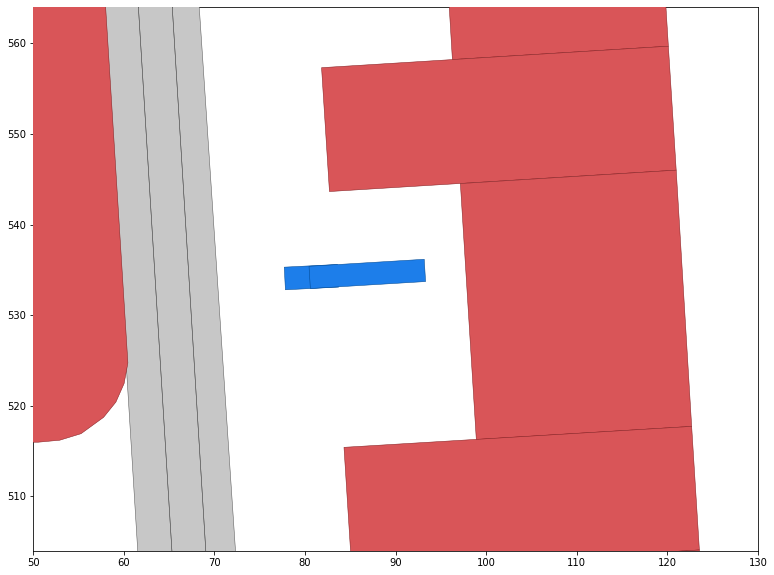

In [13]:
# plot the scenario
for i in range(0, int(len(dynamic_obstacle_trajectory.state_list)/10)):
    rnd = MPRenderer(figsize=(25, 10), plot_limits=[-30, 50, -30, 30])
    display.clear_output(wait=True)
    # plot the scenario at different time step
    scenario.draw(rnd, draw_params={'time_begin':i*10, 'focus_obstacle_id':dynamic_obstacle_id})
    # plot the planning problem set
    rnd.render()
    plt.show()